In [48]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline
def parser(x):
    return datetime.strptime(x, '%Y-%m')

In [12]:
sales = pd.read_csv("Car Sales TS/sales-cars.csv", index_col=0, date_parser= parser, parse_dates=[0])
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


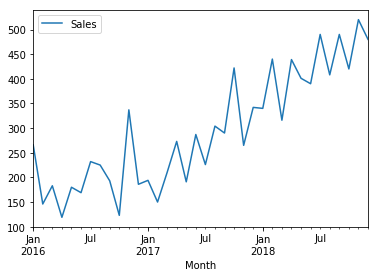

In [14]:
sales.plot()

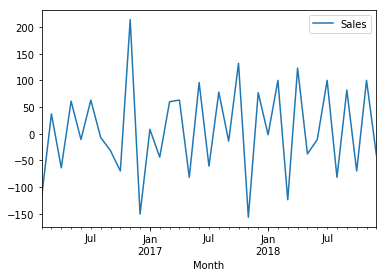

In [28]:
## Stationary
sales_diff = sales.diff()

sales_diff = sales_diff.dropna()
sales_diff.plot()

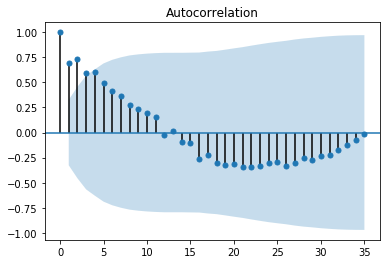

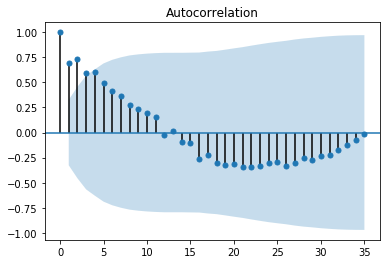

In [29]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)
# slowely decaying: no stationary

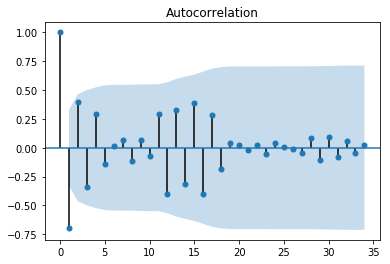

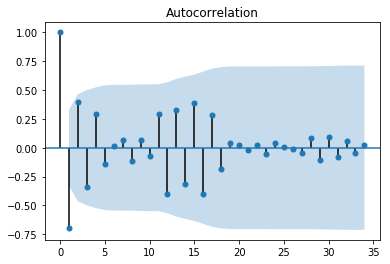

In [30]:
plot_acf(sales_diff)

In [44]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

X = sales.values
train = X[0:28] # 27 training data sample
test = X[28:] # 9 data to test
predictions = []

In [58]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()
predictions = model_ar_fit.predict(start=27, end=36)

In [46]:
test

array([[401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]])

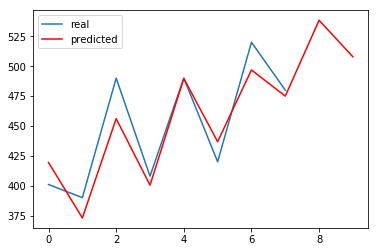

In [59]:
# plt.subplot(1, 2, 1)
plt.plot(test, label='real')
# plt.subplot(1, 2, 2)
plt.plot(predictions, color='red', label='predicted')
plt.legend(loc='best')

In [61]:
# ARIMA Model

from statsmodels.tsa.arima_model import ARIMA

298.96224995722076


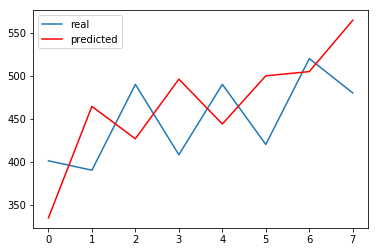

In [119]:
# p: periods taken for Autoregressive model
# d: order of integration
# q: moving average (errors taken from the previous)
model_arima = ARIMA(train, order=(3,2,3))
model_arima_fit = model_arima.fit()
predictions_ = model_arima_fit.forecast(steps=8)[0]
predictions_
plt.plot(test, label='real')
plt.plot(predictions_, color='red', label='predicted')
plt.legend(loc='best')
print(model_arima_fit.aic)

In [108]:
import itertools
p=d=q = range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [116]:
import warnings; warnings.filterwarnings('ignore')
for value in pdq:
    try:
        model_arima = ARIMA(train, order=value)
        model_arima_fit = model_arima.fit()
        print(value ,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 335.08327681905075
(0, 0, 1) 334.36881258471954
(0, 0, 2) 329.3343588224654
(0, 0, 3) 330.9346177830553
(0, 0, 4) nan
(0, 1, 0) 324.39820432750815
(0, 1, 1) 308.0082187827402
(0, 1, 2) 306.857491586063
(0, 2, 0) 343.4127008785868
(0, 2, 1) 318.2411238186263
(1, 0, 0) 330.8689624126118
(1, 0, 1) 325.63677174705026
(1, 0, 2) 322.5550151362058
(1, 0, 4) 324.3161649507499
(1, 1, 0) 309.1895633585764
(1, 1, 1) 306.8589426181817
(1, 1, 2) 306.991993236595
(1, 1, 3) 311.9621060462211
(1, 1, 4) 309.25661893435904
(1, 2, 0) 317.87726394183125
(1, 2, 1) 304.3610563324273
(1, 2, 2) 299.6134801347987
(1, 2, 3) nan
(1, 2, 4) nan
(2, 0, 0) 322.1492873110161
(2, 0, 1) 323.74172570871997
(2, 1, 0) 310.5436083305076
(2, 1, 1) 308.7289296304582
(2, 1, 4) 311.3291656457765
(2, 2, 0) 317.2961561142718
(2, 2, 1) 305.77362410784815
(2, 2, 3) 302.0998866899942
(3, 0, 0) 324.1106082520007
(3, 0, 4) nan
(3, 1, 0) 305.32983722367794
(3, 1, 1) 306.595723701764
(3, 1, 2) 303.5404472705784
(3, 1, 3) 305.

In [120]:
mean_squared_error(test, predictions_)

4706.330700449904